## 6-1 군집 알고리즘

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-11-06 12:50:22--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-11-06 12:50:23--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-11-06 12:50:23--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fruits = np.load('fruits_300.npy')

In [ ]:
print(fruits.shape) # 300 x 100 x 100 데이터 (300장의 과일 이미지, 각 이미지는 100 x 100 픽셀)
# 첫 100장은 사과, 다음 100장은 파인애플, 마지막 100장은 바나나

(300, 100, 100)


In [ ]:
print(fruits[0,0,:]) # 첫 번째 과일 이미지의 첫 번째 행 픽셀의 모든 열 픽셀값 출력

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


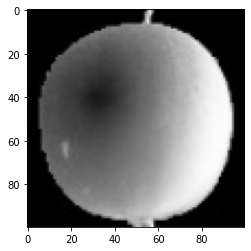

In [ ]:
plt.imshow(fruits[0], cmap = 'gray') # cmap: 사용할 컬러의 스케일 지정 가능
plt.show() # 첫 번째 과일 사진의 이미지 출력

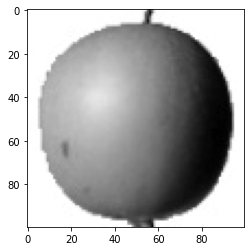

In [ ]:
plt.imshow(fruits[0], cmap = 'gray_r') # _r을 하면 색상을 반전시킴
plt.show()

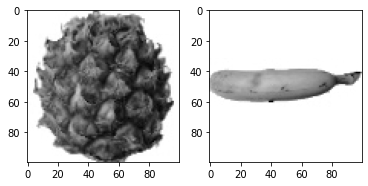

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap = 'gray_r') # 100인덱스는 101번째 이미지 (즉, 파인애플)
axs[1].imshow(fruits[200], cmap = 'gray_r') # 200인덱스는 201번째 이미지 (즉, 바나나)
plt.show()

## 픽셀 값 분석하기

In [ ]:
apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)

In [ ]:
print(apple.shape)
print(pineapple.shape)
print(banana.shape)
# 각각의 이미지 한 장의 100 x 100 픽셀을 가로로 길게 한 줄로 세운 것

(100, 10000)
(100, 10000)
(100, 10000)


In [ ]:
print(apple.mean(axis = 1)) # 각 사과 이미지의 10000개의 픽셀 값의 평균 (총 100개)

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


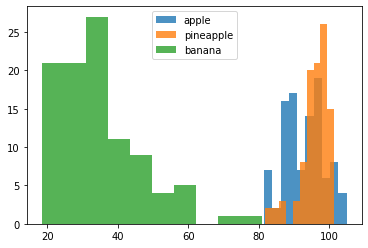

In [ ]:
plt.hist(np.mean(apple, axis = 1), alpha = 0.8)
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.8)
plt.hist(np.mean(banana, axis = 1), alpha = 0.8)
# (100, 10000)이라 10000개의 픽셆 평균 100개
plt.legend(['apple','pineapple','banana'])
plt.show()

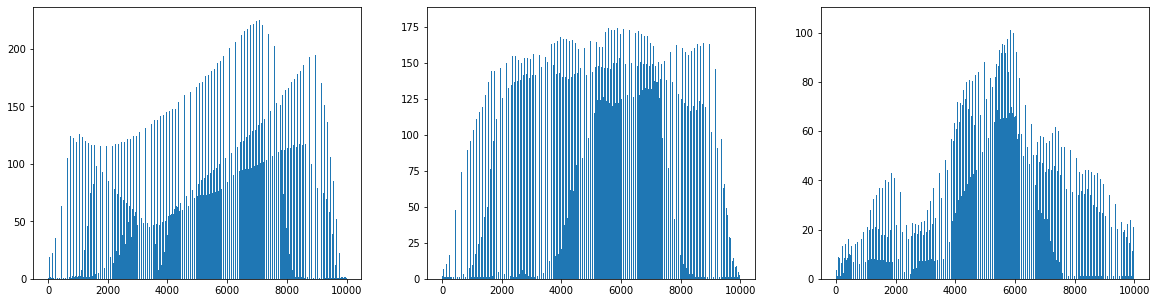

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].bar(range(10000), np.mean(apple, axis = 0))
axs[1].bar(range(10000), np.mean(pineapple, axis = 0))
axs[2].bar(range(10000), np.mean(banana, axis = 0))
plt.show()
# 10000개의 픽셀들의 각각의 100개(사과) 픽셀 데이터 평균값 (총 10000개)
# 10000개의 픽셀들의 각각의 100개(파인애플) 픽셀 데이터 평균값 (총 10000개)
# 10000개의 픽셀들의 각각의 100개(바나나) 픽셀 데이터 평균값 (총 10000개)

In [ ]:
# 100개 이미지의 1번째부터 10000번째 까지의 평균 픽셀값이 저장된 데이터를 하나의 100 x 100 평균 픽셀 데이터로 다시 만들기
apple_mean = np.mean(apple, axis = 0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis = 0).reshape(100, 100)
banana_mean = np.mean(banana, axis = 0).reshape(100, 100)

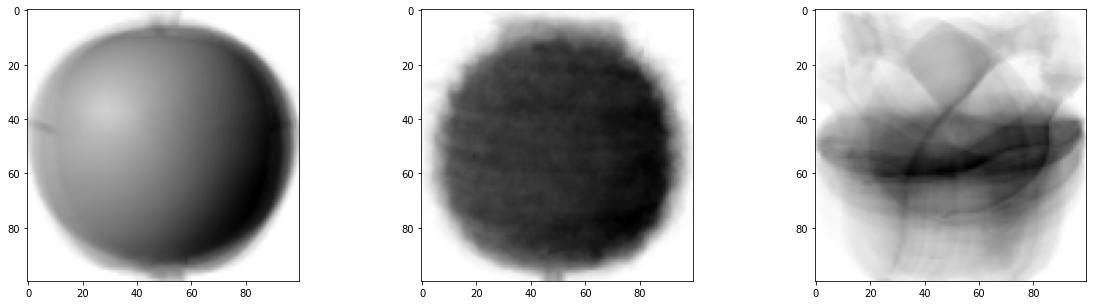

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].imshow(apple_mean, cmap = 'gray_r')
axs[1].imshow(pineapple_mean, cmap = 'gray_r')
axs[2].imshow(banana_mean, cmap = 'gray_r')
plt.show()

## 평균값과 가까운 사진 고르기

In [ ]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis = (1,2))
print(abs_mean.shape)

(300,)


In [ ]:
apple_index = np.argsort(abs_mean)[:100]
# abs_mean을 오름차순 정렬했을 때 앞의 100개의 데이터에 사과가 잘 왔을지 확인
# abs_mean이 300개의 과일 데이터와 apple_mean의 차이이므로 이 차이가 작을수록 사과라는 뜻이기 때문

In [ ]:
print(apple_index)
# 33번이 (fruits - apple_mean)값이 가장 작고 42번이 가장 큼 (100개의 데이터 중에서 가장 크다는 뜻)
# 육안으로 봤을때 100을 넘는 숫자가 없는 것으로 보아 사과를 잘 분류한것으로 보임

[33 48 70 57 87 12 78 59  1 74 86 38 50 92 69 27 68 30 66 24 76 98 15 84
 47 90  3 94 53 23 14 71 32  7 73 36 55 77 21 10 17 39 99 95 11 35 65  6
 61 22 56 89  2 13 80  0 97  4 58 34 40 43 75 82 54 16 31 49 93 37 63 64
 41 28 67 25 96  8 83 46 19 79 72  5 85 29 20 60 81  9 45 51 88 62 91 26
 52 18 44 42]


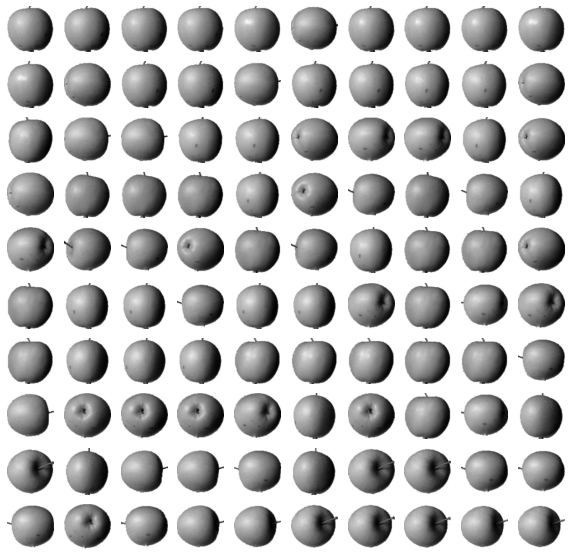

In [ ]:
fig, axs = plt.subplots(10, 10, figsize = (10,10))
for i in range(10): # 0부터 9까지
  for j in range(10): # 0부터 9까지
    axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap = 'gray_r')
    axs[i, j].axis('off')
plt.show()

## 확인문제

In [ ]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis = (1,2))

In [ ]:
banana_index = np.argsort(abs_mean)[:100]

In [ ]:
print(banana_index) # 200~299까지 바나나임 (맨 마지막 2개는 잘못 선택된 것으로 보임)

[285 212 261 291 208 286 284 265 219 264 252 290 276 283 255 203 266 200
 201 269 247 256 281 270 211 254 268 239 299 225 250 275 280 232 246 205
 244 263 297 224 279 262 289 288 238 287 218 245 217 230 274 295 209 220
 213 267 237 229 248 278 243 204 228 206 207 272 210 241 233 222 214 253
 277 235 240 282 294 271 296 249 215 258 227 259 202 236 293 260 226 216
 292 257 221 298 251 223 242 231   9  88]


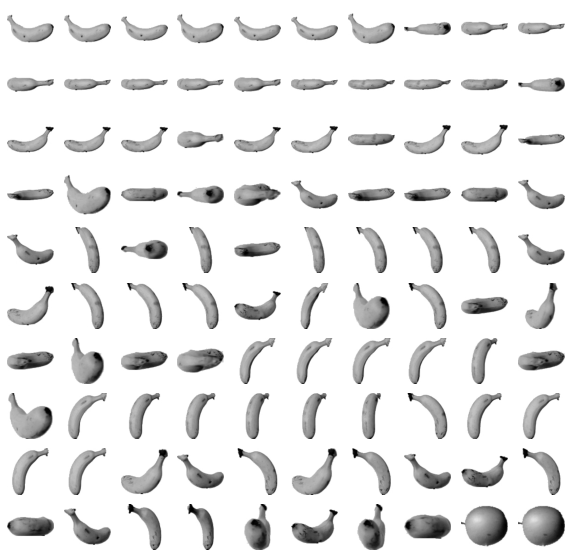

In [ ]:
fig, axs = plt.subplots(10, 10, figsize = (10, 10))

for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap = 'gray_r')
    axs[i, j].axis('off')
plt.show()

## 6-2 K-평균

## KMeans 클래스

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
# !wget은 리눅스 명령어

--2022-11-10 04:41:22--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-11-10 04:41:22--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-11-10 04:41:22--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [ ]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100) # (300 x 10000)의 2차원으로 변경

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, random_state = 42) # KMeans에서는 cluster의 중심을 센트로이드라고 부름
# 기본적으로 n_iter = 10으로 10번의 K-평균 작업을 진행한 뒤에 젤 좋은 것을 골라서 최종 결과로 출력
km.fit(fruits_2d) # 타깃이 없음 (비지도 학습)

KMeans(n_clusters=3, random_state=42)

In [ ]:
print(km.labels_) # 훈련이 끝난 결과가 저장
# n_clusters = 3으로 지정해서 0, 1, 2 총 3개의 인덱스가 존재
# 단, 각각의 인덱스가 무슨 과일인지는 알 수 없음 (KMeans가 알아서 지정)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
print(np.unique(km.labels_, return_counts = True))
# 0이 111개, 1이 98개, 2가 91개 (원래 데이터는 100, 100, 100개씩 분할 됨) [비교적 잘 분할 한 것으로 보임]

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def draw_fruits(arr, ratio = 1):
  n = len(arr) # n은 샘플 개수
  rows = int(np.ceil(n/10)) # ceil은 올림 함수, int는 정수형으로 변환하는 함수
  # 굳이 int함수를 사용하지 않아도 정수형인듯 (저자는 안전하게 int함수를 사용한 것으로 생각)
  if rows < 2:
    cols = n
  else:
    cols = 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze = False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n: # 첫 인덱스가 0이라서 (<= n)이 아니라 (< n)이다.
        axs[i, j].imshow(arr[i*10 + j], cmap = 'gray_r')
      axs[i, j].axis('off')
  plt.show()

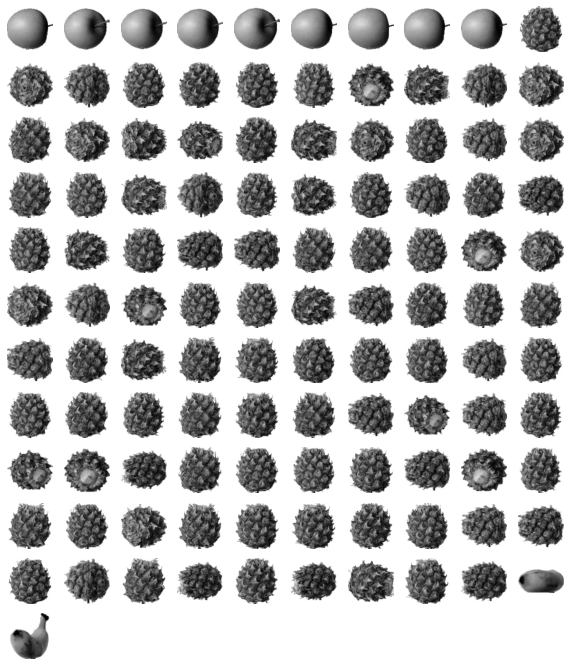

In [ ]:
draw_fruits(fruits[km.labels_ == 0])

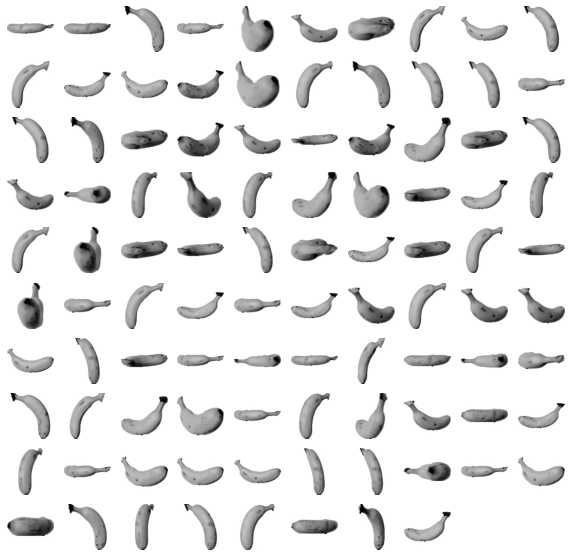

In [ ]:
draw_fruits(fruits[km.labels_ == 1])

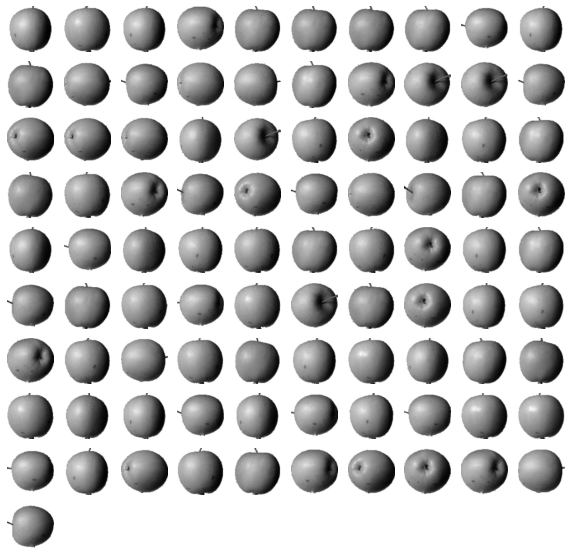

In [ ]:
draw_fruits(fruits[km.labels_ == 2])

## 클러스터 중심

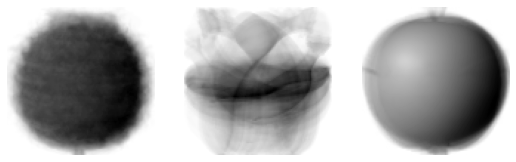

In [ ]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio = 3) # ratio = 3으로 지정해서 더 크게 그림 (default는 1)
# km 객체에 fruits_2d를 넣었기 때문에 그림을 그리기 위해 다시 3차원 (300 x 100 x 100) 형태로 변경

In [ ]:
print(km.transform(fruits_2d[100:101])) # fruits_2d의 101번째 데이터를 입력 (fruits_2d[100]은 왜 에러가 뜨는지 모르겠음)
# 추정하건데 fruits_2d[100:101]은 shape가 (1,10000)이고 fruits_2d[100]은 shape가 (10000,)으로 나와서 그런듯
# 101번째 데이터가 각 cluster의 중심과 얼마나 떨어져 있는지를 나타냄 (1번째 클러스터와 가장 가까운 것을 통해 파인애플이라고 예상)

[[3393.8136117  8837.37750892 5267.70439881]]


In [ ]:
print(km.predict(fruits_2d[100:101])) # 0번째 클러스터로 예측

[0]


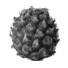

In [ ]:
draw_fruits(fruits[100:101])

In [ ]:
print(km.n_iter_) # 4번 반복으로 알고리즘이 종료

4


## 최적의 k 찾기 (엘보우 메소드)

In [ ]:
# inertia는 cluster의 중심에서 cluster에 속한 샘플들 까지의 거리의 평균 (값이 작을수록 조밀하게 모여있다는 뜻)
# 일반적으로 cluster의 개수를 늘리면 inertia값은 줄어든다는게 일반적인 생각
# 그래프의 꺾이는 지점(엘보우)을 찾으면 됨
inertia = [] # inertia는 군집 내 제곱합 (분산분석에서 within square)
for i in range(2, 7): # 2에서 6까지
  km = KMeans(n_clusters = i, random_state = 42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)

In [ ]:
print(inertia) # 각각의 n_clusters에서의 inertia값이 저장 (n_clusters = 2, 3, 4, 5, 6)

[5856532545.983113, 5074977316.088373, 4673588404.856072, 4344167864.512113, 3997030130.9539833]


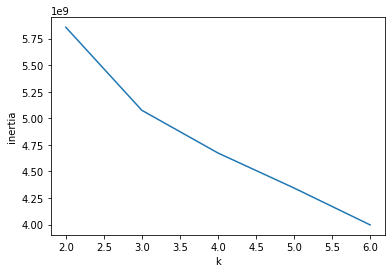

In [ ]:
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 비교적 3 지점에서 꺾임이 보이므로 최적의 k는 3으로 예상

In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f13d6f9a0d0>,
                 estimator=KMeans(n_clusters=9), k=(1, 10))

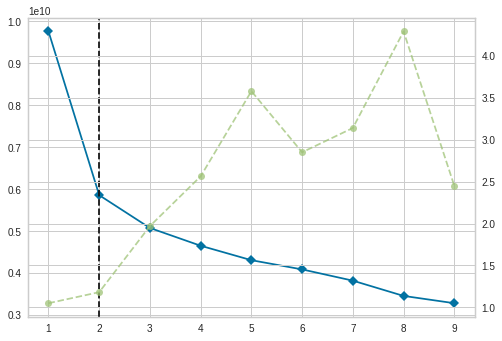

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k = (1,10))
visualizer.fit(fruits_2d)

## 주성분 분석

## PCA 클래스

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-11-16 18:14:02--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-11-16 18:14:02--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-11-16 18:14:03--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import numpy as np

fruits = np.load('fruits_300.npy') # (300 x 100 x 100)의 3차원 데이터
fruits_2d = fruits.reshape(-1, 100*100) # 사이킷런은 2차원을 요구하기 때문에 변환

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 50) # 주성분을 50개로 설정 (1 이상의 값일 때)
pca.fit(fruits_2d) # 학습

PCA(n_components=50)

In [ ]:
print(pca.components_.shape) # 각각의 50개의 주성분이 10000차원에서 어느 점에 위치하는지 나타냄

(50, 10000)


In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio = 1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  if rows < 2:
    cols = n
  else:
    cols = 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze = False)
  for i in range(rows):
    for j in range(cols):
      if 10*i + j < n:
        axs[i, j].imshow(arr[10*i + j], cmap = 'gray_r')
      axs[i, j].axis('off')
  plt.show()

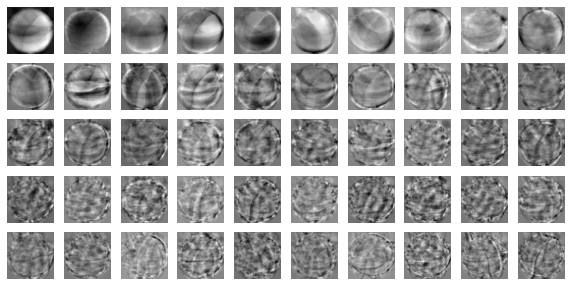

In [ ]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d) # 10000차원을 50차원으로 축소

In [ ]:
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca) # 축소한 50차원을 다시 10000차원으로 복원
print(fruits_inverse.shape)

(300, 10000)


In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100) # 복원한 데이터를 다시 3차원 리스트로

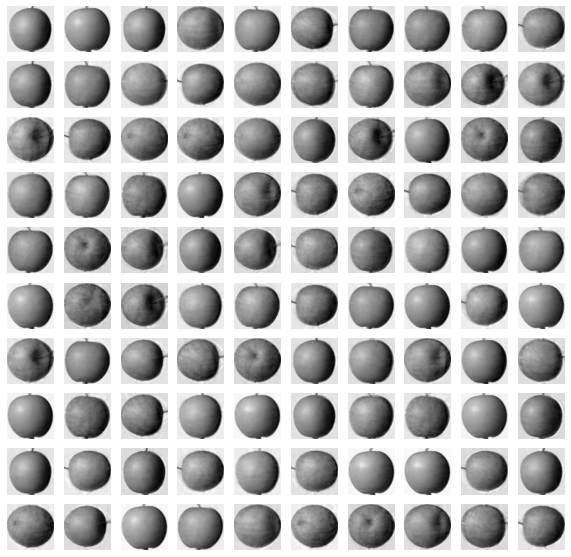

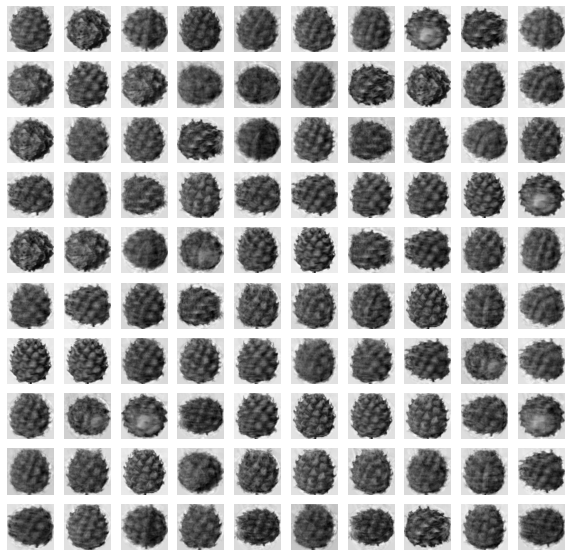

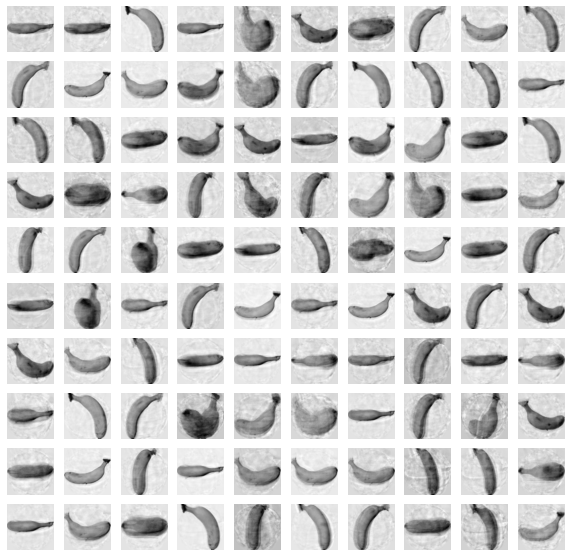

In [ ]:
for i in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[i:i+100])
  print('\n') # \n: 줄바꿈 (100개를 그리고 줄을 바꾸기 위해)
# 200분의 1로 복원한 것 치고는 굉장히 잘 복원한 것을 보여줌 (분산을 잘 나타내는 주성분을 찾았기 때문)

## 설명된 분산

In [ ]:
print(np.sum(pca.explained_variance_ratio_)) # 50개의 배열로 이루어짐
# lambda_1 + ... + lambda_p = P (단, lambda_1 > lambda_2 > ... > lambda_i로 나열)
# 각각의 (lambda_i/P)를 표로 나타냄
# 각 주성분이 얼만큼 분산을 설명하는지를 나타내는 값이 50개 저장
# 원래 훈련데이터에 있는 분산의 약 92% 정도를 설명(보존)하고 있다

0.9213839785859681


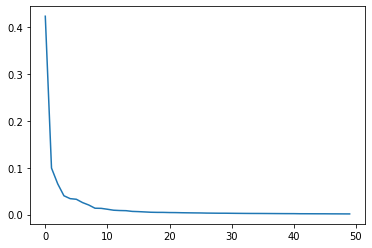

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()
# 사실상 10개정도로 주성분을 끊어도 분산을 잘 설명한다고 할 수 있음
# 10개를 넘어서면 굳이 포함하지 않아도 도움이 크게 되지 않는 주성분

## 다른 알고리즘과 함께 사용하기

### 분류기와 함께 사용하기

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
# 로지스틱 회귀를 하기 위해서는 타겟이 필요하기 때문에 생성
target = np.array([0] * 100 + [1] * 100 + [2] * 100)
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [ ]:
from sklearn.model_selection import cross_validate

score = cross_validate(lr, fruits_2d, target) # fruits_2d는 (300 x 10000) 데이터

In [ ]:
# 원본 데이터의 점수
print(np.mean(score['test_score']))
print(np.mean(score['fit_time'])) # 훈련 시간은 사용하는 컴퓨터 마다 다를 수 있음

0.9966666666666667
0.5892791748046875


In [ ]:
score = cross_validate(lr, fruits_pca, target) # fruits_pca는 (300 x 50) 데이터

In [ ]:
# 50차원 축소한 데이터의 점수
print(np.mean(score['test_score'])) # 100% 다 맞춘 교차검정 점수
print(np.mean(score['fit_time'])) # 훈련 시간이 엄청 줄어듦

1.0
0.023798322677612303


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.5) # n_components: 설명된 분산의 양 (0에서 1 사이의 값일 때)
# 설명된 분산이 0.5가 될때까지만 주성분을 찾아달라는 의미
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
print(pca.n_components_) # 주성분이 2개만 있어도 분산을 50% 설명할 수 있다

2


In [ ]:
fruits_pca = pca.transform(fruits_2d) # 차원을 10000에서 2로 축소한 데이터
print(fruits_pca.shape)

(300, 2)


In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score'])) # 주성분을 2개만 사용했는데도 교차검정 점수가 0.99까지 나옴
print(np.mean(scores['fit_time'])) 

0.99
0.03029146194458008


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### 군집과 함께 사용하기

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
# n_clusters = 3이라고 알고 있어서 지정해줬지만, 실전에서는 클러스터가 몇개인지 알 수 없음
km.fit(fruits_pca) # 비지도학습은 타겟이 없음

KMeans(n_clusters=3, random_state=42)

In [ ]:
print(np.unique(km.labels_, return_counts = True))
# 0이 110개, 1이 99개, 2가 91개로 분류

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


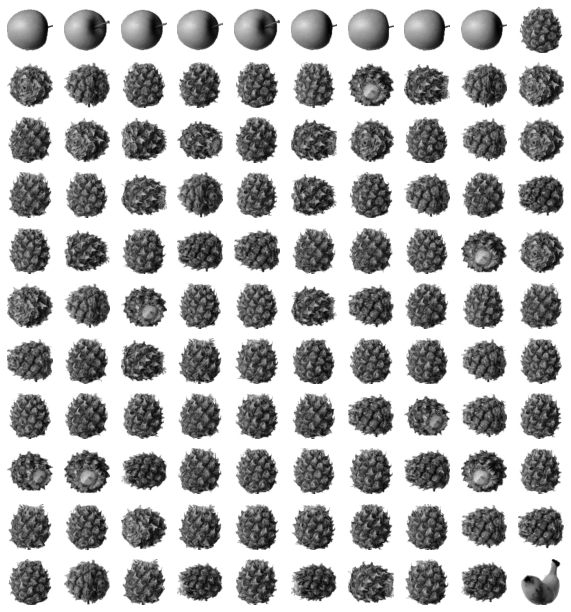

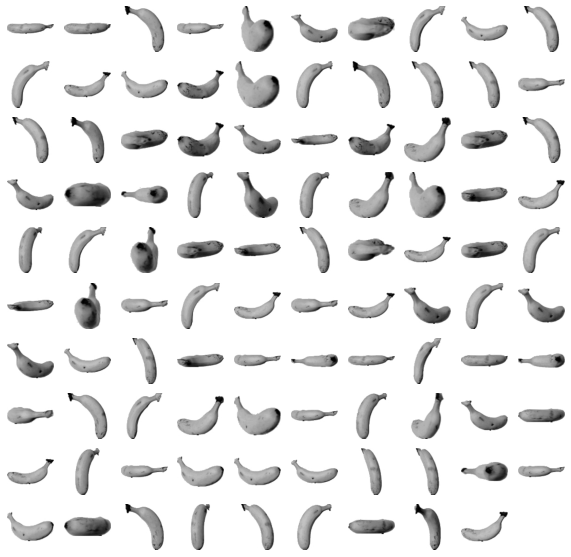

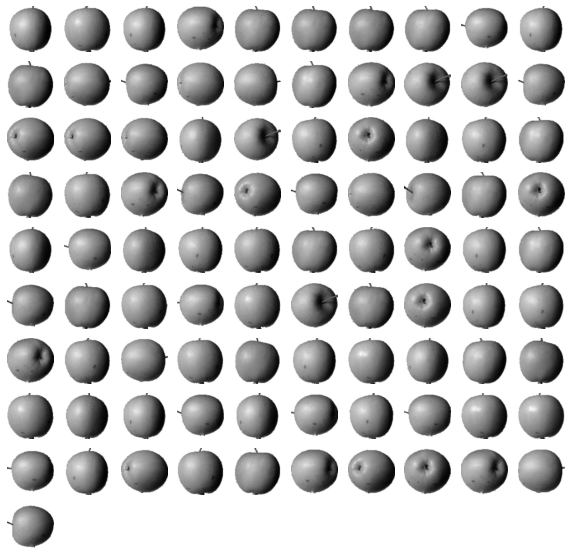

In [ ]:
for i in range(3):
  draw_fruits(fruits[km.labels_ == i]) # label이 각각 0, 1, 2인 것들의 과일 그림을 그려라
  print('\n')
# 주성분을 2개로 줄였음에도 불구하고 비교적 잘 분류한 것을 알 수 있음

### 주성분 시각화 (2개)

In [ ]:
print(fruits_pca.shape) # 주성분이 2개라서 (300 x 2)

(300, 2)


<function matplotlib.pyplot.show(*args, **kw)>

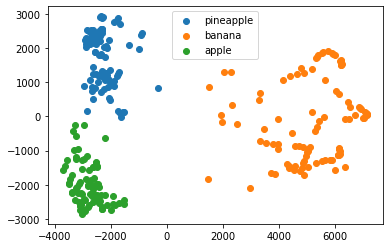

In [ ]:
for i in range(3):
  data = fruits_pca[km.labels_ == i] # for문을 돌면서 label이 0, 1, 2인 것을 산점도에 덧그림
  plt.scatter(data[:,0], data[:,1]) # x축: 첫 번째 주성분 값, y축: 두 번째 주성분 값
plt.legend(['pineapple', 'banana', 'apple'])
plt.show